## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# the number of rows in the dataset.
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.nunique()[0]

290584

d. The proportion of users converted.

In [5]:
df['converted'].value_counts()
#first way
df[df['converted'] == 1].count()[0] / df.shape[0]
#the second way for ensure  
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df['landing_page'].value_counts()
df_treatment = df[df['group'] == 'treatment']
df_num1 = df_treatment[df_treatment['landing_page']== 'old_page'].count()[0]
df_treatment = df[df['group'] == 'control']
df_num2 = df_treatment[df_treatment['landing_page']== 'new_page'].count()[0] 
print('The number of times the new_page and treatment do not match is ', )

The number of times the new_page and treatment do not match is 


f. Do any of the rows have missing values?

In [7]:
# there is no any missing values 
print("There is" ,df.isnull().sum()[0], "row missing")
print("In other words, there is no missing value")

There is 0 row missing
In other words, there is no missing value


In [8]:
#this line of code will remove any missing vlues, if there any
df = df.dropna()

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df
df1 =df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False]
df1_index = df1.index
df2.drop(df1_index ,axis= 0, errors= 'ignore', inplace = True)
df2.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id']== 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.user_id.drop_duplicates(inplace = True)
df2.drop(2893, axis = 0, inplace = True)
df2.shape[0]

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2_control = df2[df2['group'] == 'control']
df2_control['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2_treatment = df2[df2['group'] == 'treatment']
df2_treatment['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2_treatment.shape[0]/ df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The treatment group is slightly more than the control group. The ratio of converted from the control group is slightly more than the treatment group. For all of that, I think that the old is slightly better than the new page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
$$_0 : \mu_𝑝𝑛𝑒𝑤 - \mu_ 𝑝𝑜𝑙𝑑 \leq 0$$


$$_1 : \mu_𝑝𝑛𝑒𝑤  - \mu_ 𝑝𝑜𝑙𝑑 > 0$$


`````2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new =df2[df2['landing_page']=='new_page'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2[df2['landing_page']=='old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
sample = df2.sample(df2.shape[0], replace = True)
new_page_converted = sample[sample['group'] == 'control'].converted.mean()
new_page_converted


0.11930892772467065

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
sample = df2.sample(df2.shape[0], replace = True)
old_page_converted = sample[sample['group'] == 'treatment'].converted.mean()
old_page_converted

0.11859065180280737

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
obs_diff = new_page_converted - old_page_converted
obs_diff = ((df2[df2['group']=='treatment']['converted'].mean()) -(df2[df2['group']=='control']['converted'].mean()))
obs_diff

-0.0015782389853555567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
# if I want a quick way, I will use binomial
p_diffs = []
new_page_converted = np.random.binomial(n_new, p_new, 10000) /n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/ n_old
diffs = new_page_converted - old_page_converted
p_diffs.append(diffs)
# the common way is:  
#for _ in range(10000):
#   new_page_converted = np.random.choice([0,1], size = n_new, p = [p_new, (1-p_new)]).mean()
#   old_page_converted = np.random.choice([0,1], size = n_old, p = [p_old, 1-p_old]).mean()
#   diffs = new_page_converted - old_page_converted

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

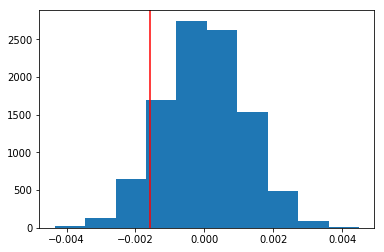

In [27]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color =  'red')
p_diffs = np.array(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
(p_diffs < obs_diff).mean()

0.093299999999999994

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>**I computed the P-Value and it is defined as the probability of observing a statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.**

>**The P-Value should be less than 0.05 to reject the null hypothesis**

>>**Because The P-Value I compute is greater 0.05, then I reject the null value**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
convert_old = df2_control[(df2_control['converted'] == 1)& (df2_control['group'] == 'control')].shape[0]
convert_new = df2_treatment[(df2_treatment['converted'] == 1)& (df2_treatment['group'] == 'treatment')].shape[0]
n_old = df2[df2['landing_page']=='old_page'].shape[0]
n_new = df2[df2['landing_page']=='new_page'].shape[0]
convert_old, convert_new, n_old, n_new 

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
stat, p_value = proportions_ztest([convert_new,convert_old] ,[n_new, n_old], alternative = 'larger')
stat, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> To know that we can say that the alternative hypothesis is true or false, we use the P_value
> If the p_value is less than 0.5, we reject the null hypothesis and accept the alternative hypothesis 
> The result of my analysis show that the p_value is about 0.9, so we reject the null hypothesis that says that the new_page make people converted more, and accept the alternative hypothesis that says that the performance of the two pages are the same or the old page has a better performance.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression because one of our values is categorical data.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
import statsmodels.api as sm
df2['intercept'] = 1
df[['control', 'treatment']] = pd.get_dummies(df['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [32]:
logit_model = sm.Logit(df2['converted'], df2[['treatment', 'intercept']]).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-05-23 17:02 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
treatment    -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
np.exp(logit_model.params)

treatment    0.985123
intercept    0.136863
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

>**The P-Value here is 0.1899 ,so we failed to reject the null hypothesis**
>**In other words, the P-Value here says that the treatment is not statistically significant.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Adding other factors makes our analysis more reliable. The problem is that some factors may not be in our data, and with more factors, other problems may exist such as multicollinearity.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
df = pd.read_csv('countries.csv')
df.country.value_counts()
df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [35]:
df[['CA', 'UK', 'US']] = pd.get_dummies(df['country'])
df_merge = df2.join(df.set_index('user_id'),on ='user_id')
logit_model = sm.Logit(df_merge['converted'], df_merge[['UK', 'US' ,'intercept']]).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-05-23 17:02 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
==================================================================

"""

In [36]:
print(np.exp(logit_model.params))
print(1/np.exp(logit_model.params))

UK           1.052027
US           1.041647
intercept    0.130350
dtype: float64
UK           0.950546
US           0.960018
intercept    7.671651
dtype: float64


>**The P-Values of the countries is greater thna 0.05 ,so we can not reject the null hypothesis**
>**so, The P-Values of the variables show that the countries are not statistically significant and don't impact on our converted rate**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:
df_merge['UK treatment'] =df_merge['UK'] * df_merge['treatment'] 
df_merge['US treatment'] =df_merge['US'] * df_merge['treatment'] 
logit_model = sm.Logit(df_merge['converted'], df_merge[['UK treatment', 'US treatment','UK','US','treatment','intercept']]).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-05-23 17:02 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
UK treatment   0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US treatment   0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
treatment     -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
==================================================================

"""

In [38]:
print(np.exp(logit_model.params))
print(1/np.exp(logit_model.params))

UK treatment    1.081428
US treatment    1.048001
UK              1.011854
US              1.017682
treatment       0.934776
intercept       0.134794
dtype: float64
UK treatment    0.924703
US treatment    0.954198
UK              0.988285
US              0.982625
treatment       1.069775
intercept       7.418713
dtype: float64


**Conclusions**
> I found that the old page performance is higher than the new page performance, so I failed to reject the null hypothesis   

> There are other factors that may not be in our data, so this makes my analysis limited.